# Diagnostics Data Decimation

This notebook shows some preliminary results for the diagnostics decimation project. Although I chose to show only one of the diagnostics, thetao at surface for a month run of (almost) the same model with 3 different resolutions, you can explore the rest of the available diagnostics in the same files or all available MOM6 diagnostics in similar files in the same dirs. 

The code is available on my fork https://github.com/nikizadehgfdl/MOM6/tree/nikizadeh_diag_decimation

Aside from implementation details, the main algorithm rests on the following idea:
 
A given diagnostics array f could be "decimated" at a level dl (not a perfect terminology as decimate hits at dl=10, better to say coarsened or aggregated or even renormalized if the physicists had their say)  by an appropriate weighted average as follows:

```
!> The decimation algorithm
!! The decimation method could be deduced (before send_data call)
!!  from the diag%x_cell_method, diag%y_cell_method and diag%v_cell_method
!! 
!! This is the summary of the decimation algoritm for a diagnostic field f:
!!  f(Id,Jd) = \sum_{i,j} f(Id+i,Jd+j) * weight(Id+i,Jd+j) / [ \sum_{i,j} weight(Id+i,Jd+j)]
!!     i and j run from 0 to dl-1 (dl being the decimation level)
!!     Id,Jd are the decimated (coarse grid) indices run over the coarsened compute grid,    
!!     if and jf are the original (fine grid) indices
!!
!!example   x_cell y_cell v_cell algorithm_id    impemented weight(if,jf)            
!!---------------------------------------------------------------------------------------
!!theta     mean   mean   mean   MMM =222        G%areaT(if,jf)*h(if,jf)             
!!u         point  mean   mean   PMM =022        dyCu(if,jf)*h(if,jf)*delta(if,Id)     
!!?         point  sum    mean   PSM =012        dyCu(if,jf)*h(if,jf)*delta(if,Id)   right?   
!!v         mean   point  mean   MPM =202        dxCv(if,jf)*h(if,jf)*delta(jf,Jd)   
!!volcello  sum    sum    sum    SSS =111        1                                   
!!T_dfxy_co sum    sum    point  SSP =110        1                                   right? T_dfxy_cont_tendency_2d
!!umo       point  sum    sum    PSS =011        1*delta(if,Id)                      
!!vmo       sum    point  sum    SPS =101        1*delta(jf,Jd)                      
!!umo_2d    point  sum    point  PSP =010        1*delta(if,Id)                      right?
!!vmo_2d    sum    point  point  SPP =100        1*delta(jf,Jd)                      right?
!!?         point  mean   point  PMP =020        dyCu(if,jf)*delta(if,Id)            right?
!!?         mean   point  point  MPP =200        dxCv(if,jf)*delta(jf,Jd)            right?
!!w         mean   mean   point  MMP =220        G%areaT(if,jf)                                       
!!h*theta   mean   mean   sum    MMS =221        G%areaT(if,jf)                      right?
!!
!!delta is the Kroneker delta
```     
     

In [24]:
import netCDF4
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
OM4p5_month_z     = netCDF4.Dataset('/archive/Niki.Zadeh/xanadu_mom6_20181023/OM4p5_IAF_BLING_CFC_abio_csf_p25config/gfdl.ncrc4-intel16-prod/1x1m0d_1057x1o/history/17080101.ocean_month_z.nc')
OM4p5_month_z_d2  = netCDF4.Dataset('/archive/Niki.Zadeh/xanadu_mom6_20181023/OM4p5_IAF_BLING_CFC_abio_csf_p25config_diagd2/gfdl.ncrc4-intel16-prod/1x1m0d_1057x1o/history/17080101.ocean_month_z_d2.nc')
OM4p25_month_z    = netCDF4.Dataset('/archive/Niki.Zadeh/xanadu_mom6_20181023/OM4p25_IAF_BLING_CFC_csf/gfdl.ncrc4-intel16-prod/1x1m0d_1440x1o/history/17080101.ocean_month_z.nc')
OM4p25_month_z_d2 = netCDF4.Dataset('/archive/Niki.Zadeh/xanadu_mom6_20181023/OM4p25_IAF_BLING_CFC_csf_diagd2/gfdl.ncrc4-intel16-prod/1x1m0d_1440x1o/history/17080101.ocean_month_z_d2.nc')
OM4p125_month_z   = netCDF4.Dataset('/archive/Niki.Zadeh/xanadu_mom6_20181023/OM4p125_IAF_csf_diagd1/gfdl.ncrc4-intel16-prod/1x1m0d_2085x1o/history/17080101.ocean_month_z.nc')
OM4p125_month_z_d2= netCDF4.Dataset('/archive/Niki.Zadeh/xanadu_mom6_20181023/OM4p125_IAF_csf_diagd2/gfdl.ncrc4-intel16-prod/1x1m0d_2085x1o/history/17080101.ocean_month_z_d2.nc')
for var in OM4p125_month_z.variables: print(var,end=' ')

xh yh z_l z_i time nv xq yq volcello thetao so obvfsq uo vo umo vmo vhml average_T1 average_T2 average_DT time_bnds 

(1, 35, 288, 360)


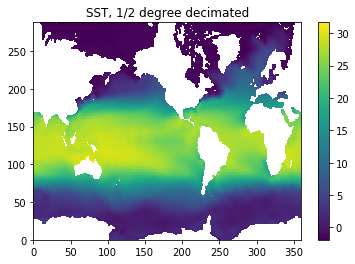

In [26]:
OMp5_thetao_d2 = OM4p5_month_z_d2.variables['thetao']
print(OMp5_thetao_d2.shape)
plt.pcolormesh(OMp5_thetao_d2[0,0,:,:]); plt.colorbar(); plt.title("SST, 1/2 degree decimated");

(1, 35, 576, 720)


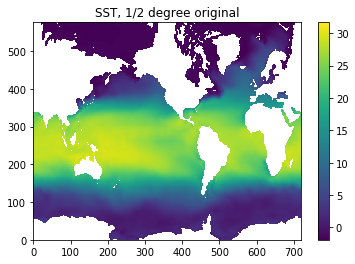

In [27]:
OMp5_thetao = OM4p5_month_z.variables['thetao']
print(OMp5_thetao.shape)
plt.pcolormesh(OMp5_thetao[0,0,:,:]); plt.colorbar(); plt.title("SST, 1/2 degree original");

(1, 35, 540, 720)


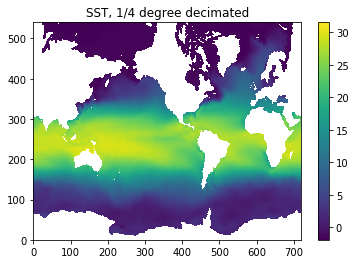

In [28]:
OMp25_thetao_d2 = OM4p25_month_z_d2.variables['thetao']
print(OMp25_thetao_d2.shape)
plt.pcolormesh(OMp25_thetao_d2[0,0,:,:]); plt.colorbar(); plt.title("SST, 1/4 degree decimated");

(1, 35, 1080, 1440)


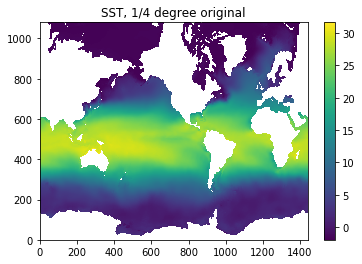

In [29]:
OMp25_thetao = OM4p25_month_z.variables['thetao']
print(OMp25_thetao.shape)
plt.pcolormesh(OMp25_thetao[0,0,:,:]); plt.colorbar(); plt.title("SST, 1/4 degree original");

(1, 35, 1120, 1440)


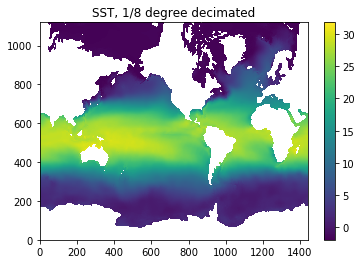

In [30]:
OMp125_thetao_d2 = OM4p125_month_z_d2.variables['thetao']
print(OMp125_thetao_d2.shape)
plt.pcolormesh(OMp125_thetao_d2[0,0,:,:]); plt.colorbar(); plt.title("SST, 1/8 degree decimated");

(1, 35, 2240, 2880)


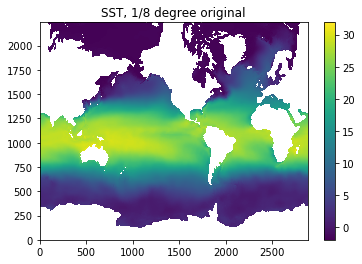

In [31]:
OMp125_thetao = OM4p125_month_z.variables['thetao']
print(OMp125_thetao.shape)
plt.pcolormesh(OMp125_thetao[0,0,:,:]); plt.colorbar(); plt.title("SST, 1/8 degree original");